# Test 24: $\chi^2$ test for an assumed population variance

## Objective

- I have a sample of values
- The population variance is expected to be $\sigma^2$
- The sample variance is computed to be $s^2$
- Is there evidence to suggest that the population variance is actually not equal to $\sigma^2$?

## Assumptions

- The sample is drawn from a normal populations

## Method

- Draw a sample of size $n$ from the population
- Assume that the population variance is some known constant $\sigma_0^2$
- Compute sample variance as 
$$
    s^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}
$$
- Compute test statistic as
$$
    \chi^2 = \frac{s^2}{\sigma_0^2} (n-1)
$$

- This follows a $\chi^2$ distribution with $n-1$ degrees of freedom

## Proof that test statistic is chi-square

In [1]:
import numpy as np 
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
POPULATION = np.random.normal(10, 5, 10_000)
N = 100
HYPOTHESISED_VARIANCE = 25

def get_test_statistic():
    sample = np.random.choice(POPULATION, N)
    sample_variance = np.sum((sample - np.mean(sample))**2) / (N-1)
    test_statistic = sample_variance/HYPOTHESISED_VARIANCE * (N-1)
    return test_statistic

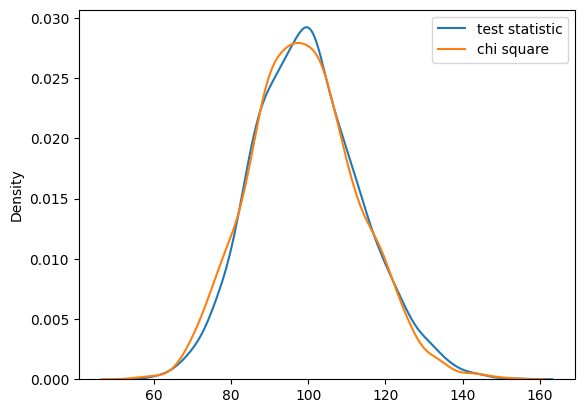

In [6]:
test_statistic_distribution = [get_test_statistic() for _ in range(3_000)]
true_chisq_distribution = np.random.chisquare(df=N-1, size=3_000)

sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_chisq_distribution, label='chi square')
plt.legend()